In [8]:
import matplotlib.pyplot as plt

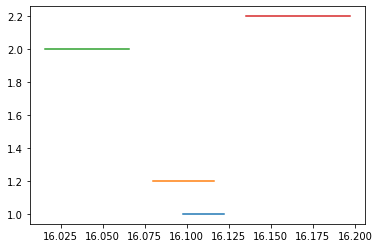

In [6]:
# emptyClosure3MillionAssignmentsAndCalls
plt.plot([16.098, 16.122], [1, 1]) # ubuntu/base
plt.plot([16.08, 16.116], [1.2, 1.2]) # ubuntu/lg
plt.plot([16.016, 16.066], [2, 2]) # develop/base
plt.plot([16.135, 16.197], [2.2, 2.2]) # develop/lg

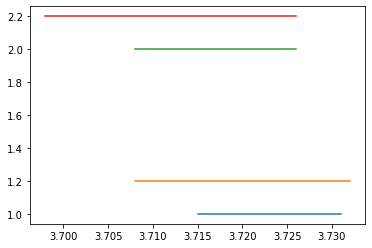

In [7]:
# multipleEmptyClosure3MillionAssignmentsAndCalls
plt.plot([3.723 - 0.008, 3.723 + 0.008], [1, 1]) # ubuntu/base
plt.plot([3.720 - 0.012, 3.720 + 0.012], [1.2, 1.2]) # ubuntu/lg
plt.plot([3.717 - 0.009, 3.717 + 0.009], [2, 2]) # develop/base
plt.plot([3.712 - 0.014, 3.712 + 0.014], [2.2, 2.2]) # develop/lg

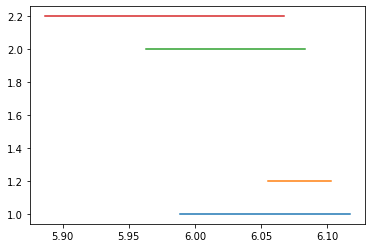

In [9]:
# multipleEmptyClosure3MillionCalls
plt.plot([6.053 - 0.064, 6.053 + 0.064], [1, 1]) # ubuntu/base
plt.plot([6.079 - 0.024, 6.079 + 0.024], [1.2, 1.2]) # ubuntu/lg
plt.plot([6.023 - 0.060, 6.023 + 0.060], [2, 2]) # develop/base
plt.plot([5.977 - 0.090, 5.977 + 0.090], [2.2, 2.2]) # develop/lg

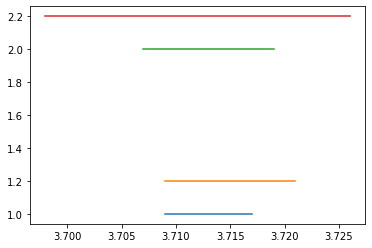

In [10]:
# multipleNonEmptyClosure3MillionAssignmentsAndCalls
plt.plot([3.713 - 0.004, 3.713 + 0.004], [1, 1]) # ubuntu/base
plt.plot([3.715 - 0.006, 3.715 + 0.006], [1.2, 1.2]) # ubuntu/lg
plt.plot([3.713 - 0.006, 3.713 + 0.006], [2, 2]) # develop/base
plt.plot([3.712 - 0.014, 3.712 + 0.014], [2.2, 2.2]) # develop/lg

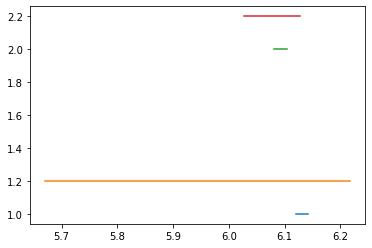

In [11]:
# multipleNonEmptyClosure3MillionCalls
plt.plot([6.131 - 0.011, 6.131 + 0.011], [1, 1]) # ubuntu/base
plt.plot([5.944 - 0.273, 5.944 + 0.273], [1.2, 1.2]) # ubuntu/lg
plt.plot([6.093 - 0.012, 6.093 + 0.012], [2, 2]) # develop/base
plt.plot([6.077 - 0.050, 6.077 + 0.050], [2.2, 2.2]) # develop/lg

# Statistical comparison tests

In [2]:
from scipy import stats
import pandas as pd

## multipleNonEmptyClosure3MillionAssignmentsAndCalls

### Attempt 1 (Ubuntu)

In [40]:
nec_assign_call_original_1 = pd.read_csv("D:/Documenten/Leuven/Masterproef/notes/performance-evaluation/ubuntu_multipleNonEmptyClosure3MillionAssignmentsAndCalls_base.csv")
nec_assign_call_lg_1 = pd.read_csv("D:/Documenten/Leuven/Masterproef/notes/performance-evaluation/ubuntu_multipleNonEmptyClosure3MillionAssignmentsAndCalls_lambdagroups.csv")

#### Test homogeneity of variances

In [41]:
stats.levene(nec_assign_call_original_1['ops_per_second'], nec_assign_call_lg_1['ops_per_second'])

LeveneResult(statistic=1.8276337562051068, pvalue=0.1827434941270854)

The p-value of 0.18 signifies that the test is not significant, meaning there is homogeneity of variances.

#### Test normal distribution

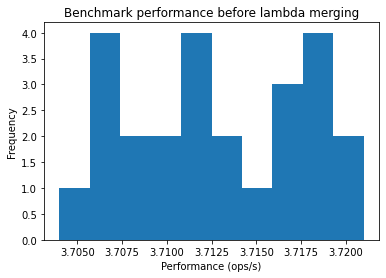

In [42]:
nec_assign_call_original_1['ops_per_second'].plot(kind="hist", title="Benchmark performance before lambda merging")
plt.xlabel("Performance (ops/s)")
plt.savefig('base_ops_per_second_1')

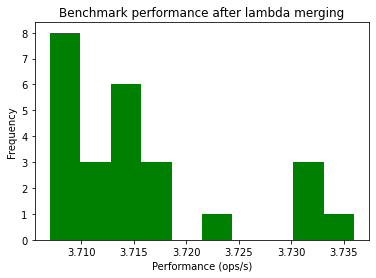

In [43]:
nec_assign_call_lg_1['ops_per_second'].plot(kind="hist", title= "Benchmark performance after lambda merging", color="green")
plt.xlabel("Performance (ops/s)")
plt.savefig('lambdagroups_ops_per_second_1')

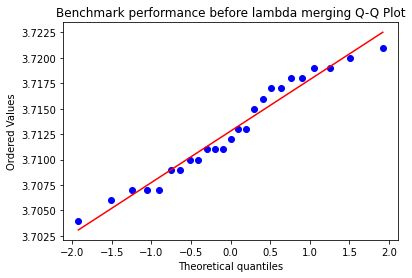

In [44]:
stats.probplot(nec_assign_call_original_1['ops_per_second'], dist="norm", plot= plt)
plt.title("Benchmark performance before lambda merging Q-Q Plot")
plt.savefig("base_qqplot_1.png")

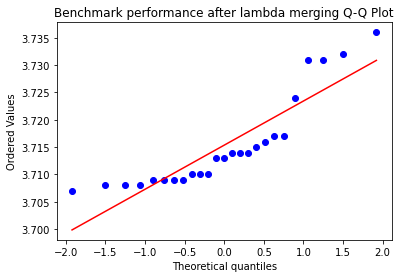

In [45]:
stats.probplot(nec_assign_call_lg_1['ops_per_second'], dist="norm", plot= plt)
plt.title("Benchmark performance after lambda merging Q-Q Plot")
plt.savefig("lambdagroups_qqplot_1.png")

In [46]:
stats.shapiro(nec_assign_call_original_1['ops_per_second'])

ShapiroResult(statistic=0.9533631801605225, pvalue=0.29810431599617004)

In [47]:
stats.shapiro(nec_assign_call_lg_1['ops_per_second'])

ShapiroResult(statistic=0.8007323741912842, pvalue=0.0002338268532184884)

According to the Shapiro-Wilk test with a boundary of 0.05 for the p-value, the second dataset is not normally distributed.

#### Test whether the performance after lambda merging differs from the performance before lambda merging

**Null hypothesis:** the ops/s is equal before and after lambda merging


**Alternative hypothesis:** the ops/s is *not* equal before and after lambda merging

We take 0.05 as a threshold for the p-value.

##### Wilcoxon Signed-Rank Test

In [55]:
stats.wilcoxon(nec_assign_call_original_1['ops_per_second'], nec_assign_call_lg_1['ops_per_second'])

WilcoxonResult(statistic=117.0, pvalue=0.3451626031380596)

The value of 0.345 is higher than 0.05, so according to this test, the null hypothesis must not be rejected.

### Attempt 2 (Develop)

In [57]:
nec_assign_call_original_2 = pd.read_csv("D:/Documenten/Leuven/Masterproef/notes/performance-evaluation/220415-develop_multipleNonEmptyClosure3MillionAssignmentsAndCalls_base.csv")
nec_assign_call_lg_2 = pd.read_csv("D:/Documenten/Leuven/Masterproef/notes/performance-evaluation/220415-develop_multipleNonEmptyClosure3MillionAssignmentsAndCalls_lambdagroups.csv")

#### Test homogeneity of variances

In [58]:
stats.levene(nec_assign_call_original_2['ops_per_second'], nec_assign_call_lg_2['ops_per_second'])

LeveneResult(statistic=9.924398625429642, pvalue=0.0028067724644932368)

The p-value of 0.02 signifies that the test is significant, meaning there is no homogeneity of variances, if we take a boundary of 0.05 for our p-value.

#### Test normal distribution

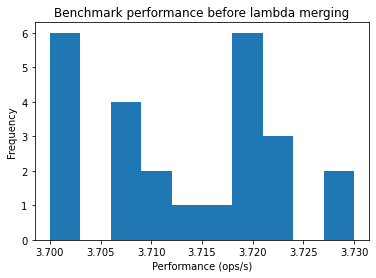

In [59]:
nec_assign_call_original_2['ops_per_second'].plot(kind="hist", title="Benchmark performance before lambda merging")
plt.xlabel("Performance (ops/s)")
plt.savefig('base_ops_per_second_2')

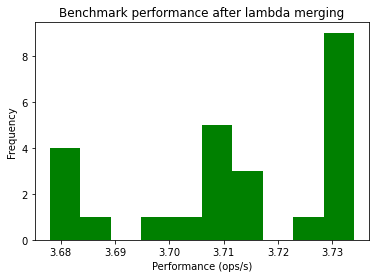

In [60]:
nec_assign_call_lg_2['ops_per_second'].plot(kind="hist", title= "Benchmark performance after lambda merging", color="green")
plt.xlabel("Performance (ops/s)")
plt.savefig('lambdagroups_ops_per_second_2')

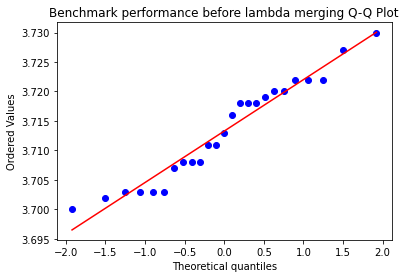

In [61]:
stats.probplot(nec_assign_call_original_2['ops_per_second'], dist="norm", plot= plt)
plt.title("Benchmark performance before lambda merging Q-Q Plot")
plt.savefig("base_qqplot_2.png")

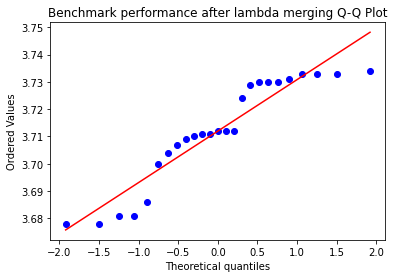

In [62]:
stats.probplot(nec_assign_call_lg_2['ops_per_second'], dist="norm", plot= plt)
plt.title("Benchmark performance after lambda merging Q-Q Plot")
plt.savefig("lambdagroups_qqplot_2.png")

In [63]:
stats.shapiro(nec_assign_call_original_2['ops_per_second'])

ShapiroResult(statistic=0.943942666053772, pvalue=0.18247583508491516)

In [65]:
stats.shapiro(nec_assign_call_lg_2['ops_per_second'])

ShapiroResult(statistic=0.8751510381698608, pvalue=0.005497519392520189)

According to the Shapiro-Wilk test with a boundary of 0.05 for the p-value, the second dataset is not normally distributed.

#### Test whether the performance after lambda merging differs from the performance before lambda merging

**Null hypothesis:** the ops/s is equal before and after lambda merging


**Alternative hypothesis:** the ops/s is *not* equal before and after lambda merging

We take 0.05 as a threshold for the p-value.

##### Wilcoxon Signed-Rank Test

In [67]:
stats.wilcoxon(nec_assign_call_original_2['ops_per_second'], nec_assign_call_lg_2['ops_per_second'])

WilcoxonResult(statistic=147.0, pvalue=0.6915188431739807)

The value of 0.69 is higher than 0.05, so according to this test, the null hypothesis must not be rejected.

### Attempt 3 (Ubuntu)

In [80]:
nec_assign_call_original_3 = pd.read_csv("D:/Documenten/Leuven/Masterproef/notes/performance-evaluation/220421-12.52-ubuntu_multipleNonEmptyClosure3MillionAssignmentsAndCalls_base.csv")
nec_assign_call_lg_3 = pd.read_csv("D:/Documenten/Leuven/Masterproef/notes/performance-evaluation/220421-13.08-ubuntu_multipleNonEmptyClosure3MillionAssignmentsAndCalls_lambdagroups.csv")

#### Test homogeneity of variances

In [82]:
stats.levene(nec_assign_call_original_3['ops_per_second'], nec_assign_call_lg_3['ops_per_second'])

LeveneResult(statistic=0.8423653619363, pvalue=0.36331002918856703)

The p-value of 0.36 signifies that the test is not significant, meaning there is homogeneity of variances.

#### Test normal distribution

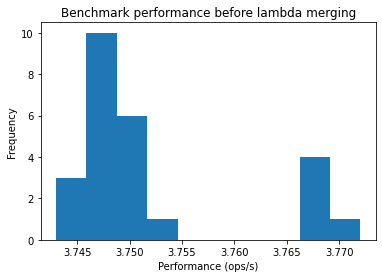

In [83]:
nec_assign_call_original_3['ops_per_second'].plot(kind="hist", title="Benchmark performance before lambda merging")
plt.xlabel("Performance (ops/s)")
plt.savefig('base_ops_per_second_3')

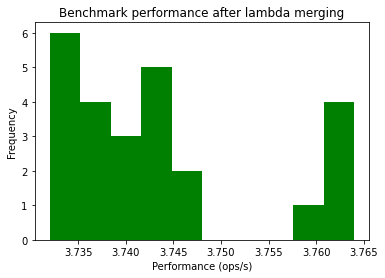

In [84]:
nec_assign_call_lg_3['ops_per_second'].plot(kind="hist", title= "Benchmark performance after lambda merging", color="green")
plt.xlabel("Performance (ops/s)")
plt.savefig('lambdagroups_ops_per_second_3')

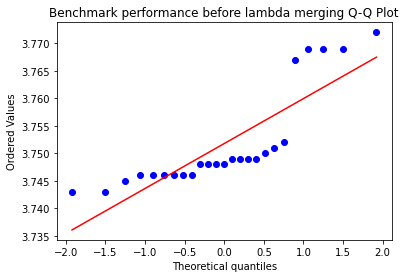

In [85]:
stats.probplot(nec_assign_call_original_3['ops_per_second'], dist="norm", plot= plt)
plt.title("Benchmark performance before lambda merging Q-Q Plot")
plt.savefig("base_qqplot_3.png")

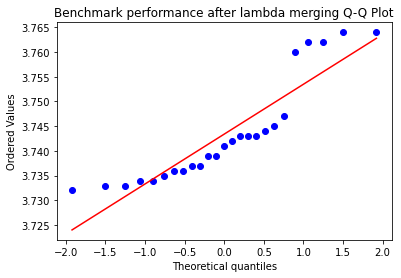

In [86]:
stats.probplot(nec_assign_call_lg_3['ops_per_second'], dist="norm", plot= plt)
plt.title("Benchmark performance after lambda merging Q-Q Plot")
plt.savefig("lambdagroups_qqplot_3.png")

In [87]:
stats.shapiro(nec_assign_call_original_3['ops_per_second'])

ShapiroResult(statistic=0.7191476821899414, pvalue=1.3335505173017737e-05)

The p-value of 1.3e-05 is lower than the boundary of 0.05, so according to the Shapiro-Wilk test the second dataset is not normally distributed.

In [88]:
stats.shapiro(nec_assign_call_lg_3['ops_per_second'])

ShapiroResult(statistic=0.8239523768424988, pvalue=0.0005865103448741138)

The p-value of 0.0005 is lower than the boundary of 0.05, so according to the Shapiro-Wilk test the second dataset is not normally distributed.

#### Test whether the performance after lambda merging differs from the performance before lambda merging

**Null hypothesis:** the ops/s is equal before and after lambda merging


**Alternative hypothesis:** the ops/s is *not* equal before and after lambda merging

We take 0.05 as a threshold for the p-value.

##### Wilcoxon Signed-Rank Test

In [90]:
stats.wilcoxon(nec_assign_call_original_3['ops_per_second'], nec_assign_call_lg_3['ops_per_second'])

WilcoxonResult(statistic=83.5, pvalue=0.034173786640167236)

The value of 0.034 is lower than 0.05, so according to this test, the null hypothesis must be rejected.

# Performance test algorithms

In [16]:
def generate_lambda(arity, implementation):
    parameters = ""
    for i in range(arity):
        if i > 0:
            parameters += ", "
        parameters += f"a{i}: Int"
    if arity > 0:
        parameters += " -> "
    result = "{" + parameters + implementation + "}"
    return result

In [27]:
for i in range(500):
    lambdaDef = generate_lambda(1, "println(\"a0: $a0\")")
    print(f"val lambda{i} = {lambdaDef}")

val lambda0 = {a0: Int -> println("a0: $a0")}
val lambda1 = {a0: Int -> println("a0: $a0")}
val lambda2 = {a0: Int -> println("a0: $a0")}
val lambda3 = {a0: Int -> println("a0: $a0")}
val lambda4 = {a0: Int -> println("a0: $a0")}
val lambda5 = {a0: Int -> println("a0: $a0")}
val lambda6 = {a0: Int -> println("a0: $a0")}
val lambda7 = {a0: Int -> println("a0: $a0")}
val lambda8 = {a0: Int -> println("a0: $a0")}
val lambda9 = {a0: Int -> println("a0: $a0")}
val lambda10 = {a0: Int -> println("a0: $a0")}
val lambda11 = {a0: Int -> println("a0: $a0")}
val lambda12 = {a0: Int -> println("a0: $a0")}
val lambda13 = {a0: Int -> println("a0: $a0")}
val lambda14 = {a0: Int -> println("a0: $a0")}
val lambda15 = {a0: Int -> println("a0: $a0")}
val lambda16 = {a0: Int -> println("a0: $a0")}
val lambda17 = {a0: Int -> println("a0: $a0")}
val lambda18 = {a0: Int -> println("a0: $a0")}
val lambda19 = {a0: Int -> println("a0: $a0")}
val lambda20 = {a0: Int -> println("a0: $a0")}
val lambda21 = {a0: Int